In [1]:
import sys
sys.path.insert(0,'../libs')
import fourier as foo
from matplotlib import pyplot as plt
import numpy as np
from scipy import fftpack
from scipy import misc
# import seaborn as sns
# sns.despine()
from numpy import linalg

## Ejercicio 1

In [34]:
def low_pass_filter(img, CUTOFF_FUN):
    # CUTOFF_FUN es una función que toma como parámetro la distncia de una freq. al centro del espacio,
    # y decide en pos a ella si cortar ese valor o no. CUTOFF_FUN devuelve true si esa frecuencia pasa
    filtered_img = np.copy(img)
    m = len(img); n = len(img[0])
    distance = lambda i,j: np.sqrt(abs(i-m/2)**2 + abs(j-n/2)**2)
    for i in range(m):
        for j in range(n):
            if not CUTOFF_FUN(distance(i,j)):
                filtered_img[i][j] = 0
    return filtered_img

**Nota:** Si en algun momento se reodernana los cuadrantes de la imagen en el dominio de las frecuencias, antes de ser convertido por la IFFT, los mismos deben tener el mismo orden; ya sea el original, o con el el (0,0) de las frecuencias centrado en la imagen.

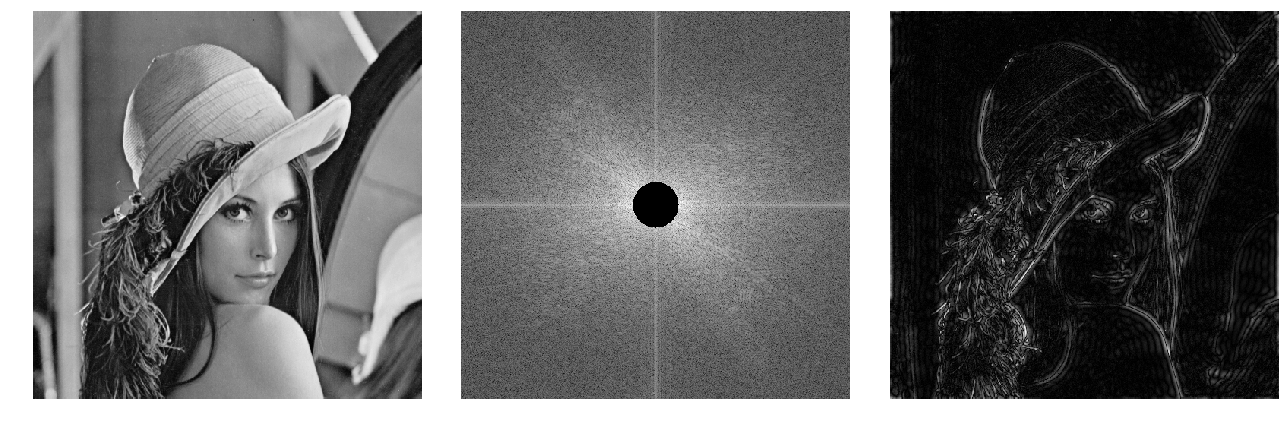

In [47]:
img = misc.imread('lena.png')
img_F = fftpack.fft2(img)
plt.figure(figsize=(18,10))
plt.subplot(1,3,1); plt.axis('off')
plt.imshow(img, cmap='gray')
plt.subplot(1,3,2); plt.axis('off')
# Aca ya reordeno los valores en complejo de toda la imagen (parte real e imaginaria),
# de forma de operar directamente con ellos, sin preocuparme.
img_F = foo.fix_norm_plot_regions(img_F)
img_ABS = np.abs(img_F)

# funcion de corte
CUTOFF_FUNC = lambda d: (d> 30)
img_ABS = low_pass_filter(img_ABS, CUTOFF_FUNC)
plt.imshow(foo.log_transform(img_ABS), cmap='gray')
plt.subplot(1,3,3); plt.axis('off')
img_MOD = foo.assemble_complex(img_ABS, \
                               np.angle(img_F))
img_deMOD = fftpack.ifft2(img_MOD)
plt.imshow(np.abs(img_deMOD), cmap='gray')
plt.tight_layout()
plt.show()

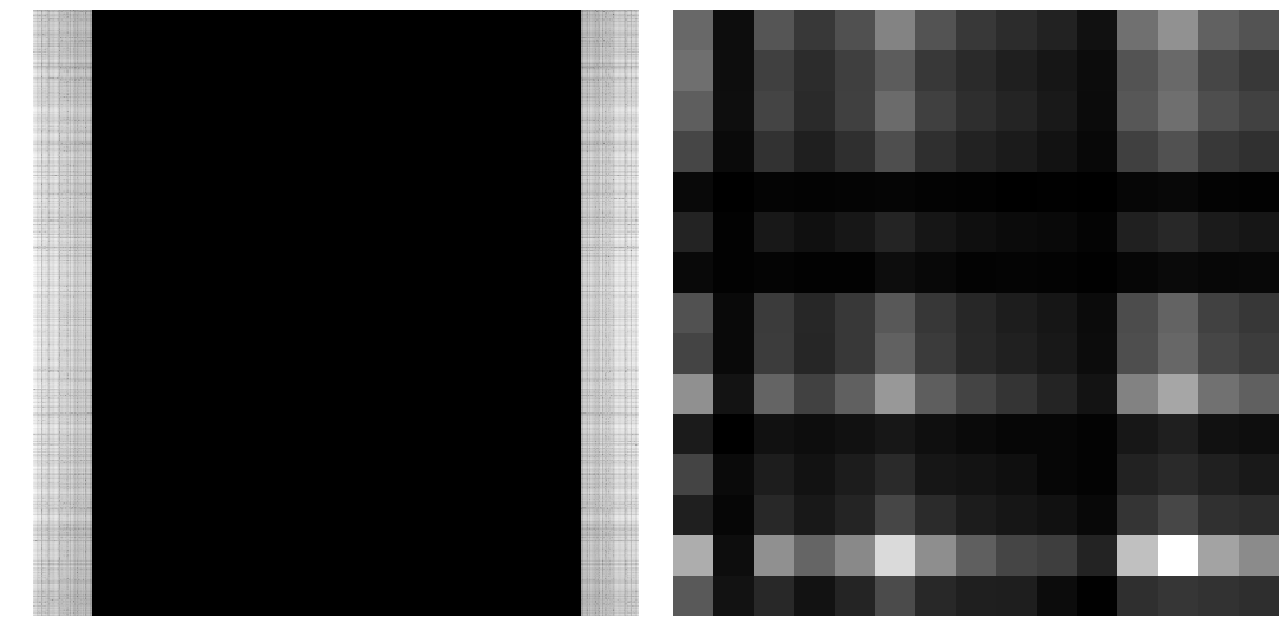

In [32]:
plt.figure(figsize=(18,10)); plt.subplot(1,2,1); plt.axis('off')
KERN_F = foo.fix_norm_plot_regions(np.dot(linalg.inv(img_F),img_MOD))
plt.imshow(foo.log_transform(np.abs(KERN_F)),cmap='gray')
plt.subplot(1,2,2); plt.axis('off')
KERN = np.abs(fftpack.ifft2(KERN_F[0:15,0:15]))
plt.imshow(KERN, cmap='gray')
plt.tight_layout(); plt.show()

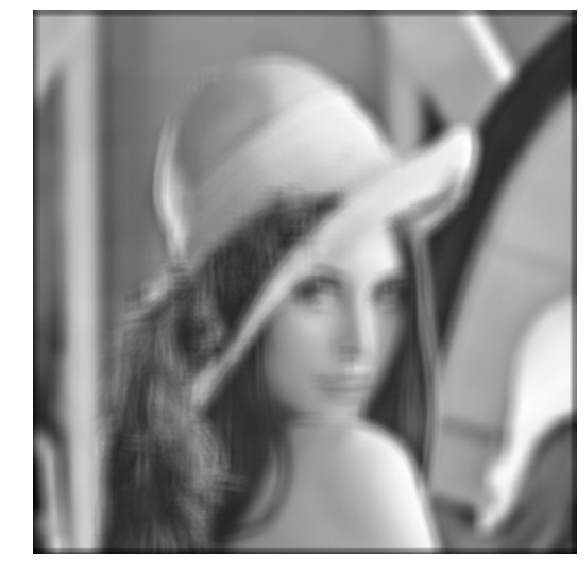

In [33]:
# reduced_KERN = KERN[0:5,0:5]
reduced_KERN = KERN
reduced_KERN = reduced_KERN/np.amax(reduced_KERN)
# print(reduced_KERN.shape)
plt.figure(figsize=(18,10)); plt.axis('off')
plt.imshow(foo.convolve(img, reduced_KERN) ,cmap='gray')
plt.show()